In [8]:
# imports
import numpy as np
import networkx as nx
import random

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Steps
#1. Create synthetic data 
#2. Plot adjacency matrix


In [16]:
#1. Create synthetic data
# Intially get data with 2 partitions, each group comtains nodes that are eigher pro or anti something (like Trump)


DATA_PATH = './data/'

def get_labels(G):
	ids = G.nodes()
	id_labels = {}

	sets = G.graph['partition']
	no_of_sets = len(sets)

	for i in range(1, no_of_sets + 1):
		#[set([0, 1, 2]), set([3, 4, 5]), set([8, 6, 7]), set([9, 10, 11])]
		nodes_set = sets[i-1]
		for node_id in list(nodes_set):
			id_labels[node_id] = i

	# print('Number of total users', len((ids)))
	return id_labels, ids

def update_source_target_dictionary(source_targets, source, target):
	if source not in source_targets:
		source_targets[source] = []

	targets = source_targets[source]
	targets.append(target)
	source_targets[source] = targets

	return source_targets

def get_edges(G):
	source_targets = {}
	for source, target in G.edges():
		source_targets = \
			update_source_target_dictionary(source_targets, source, target)

		source_targets = \
			update_source_target_dictionary(source_targets, target, source)
		
	# print(source_targets)
	return source_targets	



def generate_networks(graph_name, num_of_comm, nodes_in_each_comm,\
    in_cluster_prob, out_cluster_probab, save):

    G = nx.planted_partition_graph(num_of_comm, nodes_in_each_comm,\
     in_cluster_prob, out_cluster_probab)

    id_labels, ids = get_labels(G)
    print('id_labels length', len(id_labels))

    source_targets = get_edges(G)
    print('source_targets length', len(source_targets))

    if save:
         nx.write_edgelist(G, DATA_PATH + graph_name + ".edgelist")
    
    return G, ids, id_labels


mean_c = 8.0
n = 200
num_of_comm = 2

# This value can be change to geberate multiple networks with varying in and out degree nod
c_in_start = 14
c_in_end = 16

networks = []
network_labels = {}
network_ids = {}

save = True
       
for c_in_minus_c_out in range(c_in_start, c_in_end, 2):

    c_in = mean_c + 1.0*c_in_minus_c_out/2
    c_out = mean_c - 1.0*c_in_minus_c_out/2
    p_in = 1.0*c_in/n
    p_out = 1.0*c_out/n	

    print(c_in, c_out)
    print('p_in, p_out: ', p_in, p_out)


    # p_in = 0.5
    # p_out = 0.1	

    nodes_in_each_comm = int(1.0*n/num_of_comm)

    graph_name = 'planted_partition_'\
     + str(n) + '_'+ '{:04.1f}'.format(c_in_minus_c_out) + '_' \
     + str(c_in) + '_' + str(c_out) 

    G, ids, id_labels = generate_networks(graph_name, num_of_comm, nodes_in_each_comm, p_in, p_out, save)
    networks.append(G)
    network_labels[len(networks)] = id_labels
    network_ids[len(networks)] = ids

print(len(networks))         
print(type(networks[0]))

(15.0, 1.0)
('p_in, p_out: ', 0.075, 0.005)
('id_labels length', 200)
('source_targets length', 200)
1
<class 'networkx.classes.graph.Graph'>


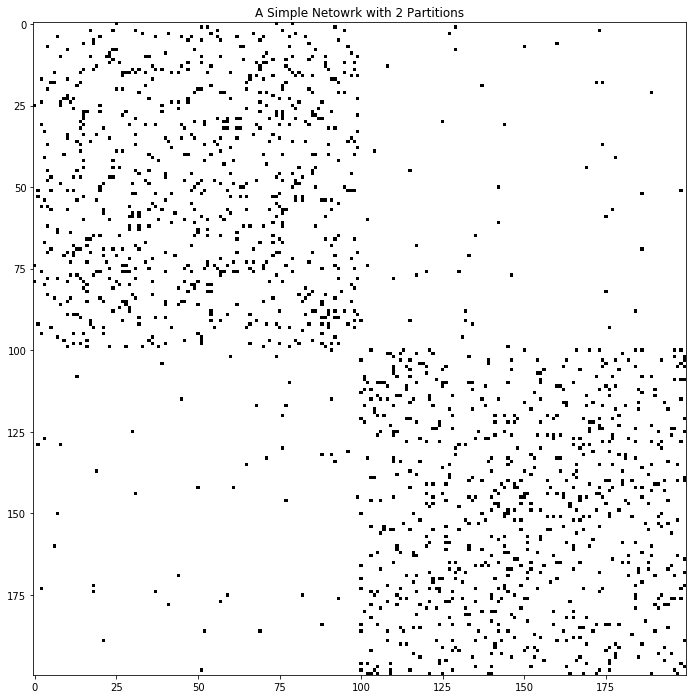

In [18]:
#2. Plot adjacency matrix
# Source: http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

def draw_adjacency_matrix(adjacency_matrix):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    
    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(16, 12)) # in inches
    plt.title('A Simple Netowrk with 2 Partitions')
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    


G_planted_paertition = networks[0]
adjacency_matrix = nx.to_numpy_matrix(G_planted_paertition, nodelist= random.shuffle(G.nodes())) # nodelist = node_order
draw_adjacency_matrix(adjacency_matrix) 